If you formulate 2 hypothesis, How confidently can you point to the True one ?
Ask and quantitatively Answer questions(about data, predictions, probability).

# 1- Loaded Dice

Tommy seems to be winning a lot of games recently. You are, in fact, *highly suspicious* of his treasured dice. So you've been recording the result of every role, and they are in `loaded_500.txt`. 

Let's try and answer the simplest question we can: Is *Tommy* rolling too many sixes?

Let's answer the question rigorously.

1. Visualise the data. Make sure we understand it.
2. Reduce or quantify the data
3. Pose our hypothesis (and visualise)
4. Calculate

In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dark_background')
data = np.loadtxt("loaded_500.txt")
#data, 500 number between 1 and 6

### Visualising

A historgram is fine.

[1. 2. 3. 4. 5. 6.] [70 84 86 74 88 98]


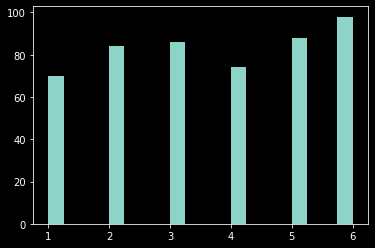

In [3]:
unique, counts = np.unique(data, return_counts=True)
print(unique, counts)
plt.hist(data, bins=20); # 6 is more and 1 is less

### Reduce or quantify data

We don't need each individual roll. We really just want the total number of sixes rolled and the total number of rolls.

In [4]:
num_sixes = (data == 6).sum()
num_total = data.size
print(num_sixes)
print(num_total)

98
500


### Pose our Hypothesis

We have two outcomes when we roll a dice. We roll a six, or we roll something else. 

With a fair die (our null hypothesis), $p(6) = \frac{1}{6}$.  The second option is $\frac{5}{6}$

As this is discrete with two options, we are looking at the *binomial* distribution.

What is the chance we roll 98 *or more* sixes with a fair die?

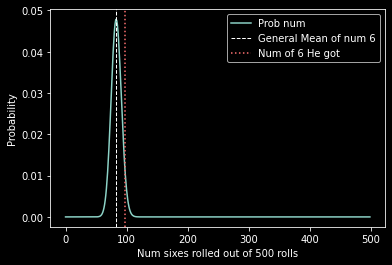

In [5]:
from scipy.stats import binom
n = np.arange(num_total) # from 0 to 500
prob_n = binom.pmf(n, num_total, 1/6) # rolled it 500 times each time has prob of 1/6 to be 6
plt.plot(n, prob_n, label="Prob num") # prob of get 1 number from 6 (1/6)
plt.axvline(num_total / 6, ls="--", lw=1, label="General Mean of num 6")

plt.axvline(num_sixes, ls=":", color="#ff7272", label="Num of 6 He got") #Above the avg (Not so much)
plt.xlabel(f"Num sixes rolled out of {num_total} rolls")
plt.ylabel("Probability")
plt.legend();

0.036570201310277384
Only 3.7% of the time with a fair dice you'd roll more than this many sixes(98).


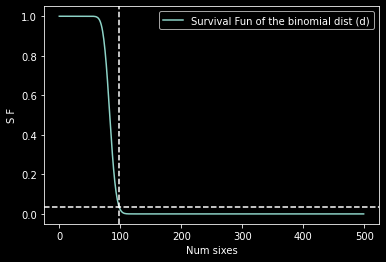

In [6]:
# What is the prob of getting 98 or more of 6 ?
# want the area under the above curv from (Num of 6 He got)[98] to the Max (500). USING servival function
d = binom(num_total, 1/6) #d is a binomial dist preconfigured to num_total and 1/6
plt.plot(n, d.sf(n) , label="Survival Fun of the binomial dist (d)") # n is a list from 0 to 500
plt.axvline(num_sixes, ls="--")   # vertical line at 98
sf = d.sf(num_sixes) # actual value of the survival fun at 98
plt.axhline(sf, ls="--")
plt.xlabel("Num sixes")
plt.ylabel("S F");
print(sf)
print(f"Only {sf * 100:.1f}% of the time with a fair dice you'd roll more than this many sixes(98).")
#SF (Survival Function): opposite of CDF The total probability from a value to oo ,, = 1-CDF
# CDF is <= k So SF > k not >= k 
# CDF from point to the left(less than or equal to it) ........ SF from point to the right (More than it)
plt.legend();

IF we used p-value here we would say that the h0 is that the dice is fair and we try to reject that assumption, so the sf is 0.037 is less than 0.05 AND THEN we reject the null hypothesis (h0). 

He is a liar :D

***********

# 2 - Meteorite Impacts

NASA has helpfully provided a dataset which lists recorded meteorite impacts - get it in `"Meteorite_Landings.csv"`. Can we utilise this dataset to predict the chance that, within 1000 years, a high-impact meteor will strike the planet?

Let's define high-impact as an Asteroid greater than 1km in diameter. 

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("Meteorite_Landings.csv")
df = data.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45716 entries, 0 to 45715
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         45716 non-null  object 
 1   id           45716 non-null  int64  
 2   nametype     45716 non-null  object 
 3   recclass     45716 non-null  object 
 4   mass         45585 non-null  float64
 5   fall         45716 non-null  object 
 6   year         45428 non-null  float64
 7   reclat       38401 non-null  float64
 8   reclong      38401 non-null  float64
 9   GeoLocation  38401 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 3.5+ MB


In [8]:
df.head()

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775000, 6.083330)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.183330, 10.233330)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.216670, -113.000000)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.883330, -99.900000)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.166670, -64.950000)"


In [9]:
df.isnull().sum()

name              0
id                0
nametype          0
recclass          0
mass            131
fall              0
year            288
reclat         7315
reclong        7315
GeoLocation    7315
dtype: int64

### Investigate and explore Data

Now, from the fact that we have different numbers of non-null objects in the previous info, we should make sure the columns we want to work with all have sensible values.

In [10]:
df2 = df.dropna(subset=["mass", "year"])  # Remove NaN values
df2 = df2[df2["mass"] > 0]  # Zero mass impacts are also missing data
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45292 entries, 0 to 45715
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         45292 non-null  object 
 1   id           45292 non-null  int64  
 2   nametype     45292 non-null  object 
 3   recclass     45292 non-null  object 
 4   mass         45292 non-null  float64
 5   fall         45292 non-null  object 
 6   year         45292 non-null  float64
 7   reclat       38097 non-null  float64
 8   reclong      38097 non-null  float64
 9   GeoLocation  38097 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 3.8+ MB


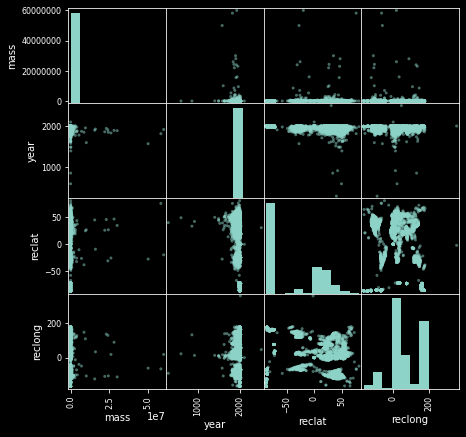

In [16]:
#Let's also explore the data visually.
pd.plotting.scatter_matrix(df[["mass", "year", "reclat", "reclong"]], figsize=(7,7));

An important thing to note is we can make out the continents in the scatter. A real analysis would have to look at detection efficiency properly (something like the percentage of meteorites we successfully observe as a function of location on the planet), but we'll just keep in mind that this dataset only captures some meteorites and only in populated areas.

Now, mass is a positive value that spans many orders of magnitude, so it'll probably be easier to look at log mass instead of mass itself.

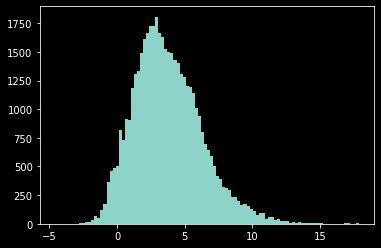

In [12]:
year = df2["year"]
masses = df2["mass"]
logmass = np.log(masses) # transform from mass to log mass become looks like a distribution we can characterize easily
plt.hist(logmass, bins=100);

Yup, this is far easier to quantify than the mass distribution. As to the years, obviously there is an issue here - our technology has changed a lot over the last few thousand years, and so our detection efficiency should also take this into account. However, we don't have the data to make that analysis in this dataset. So what we can do is take our peak year as a pseudo-worst case.

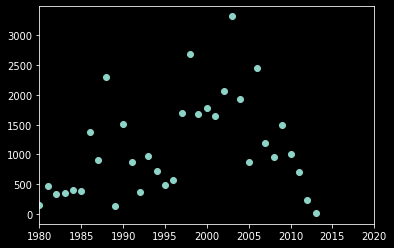

In [15]:
counts = year.value_counts()
plt.scatter(counts.index, counts) #counts.index is the actual years , counts number of meteorits
plt.xlim(1980, 2020);

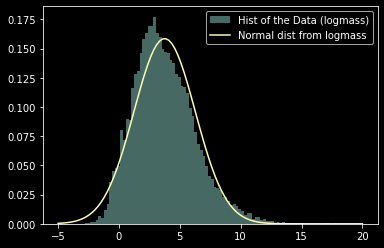

In [37]:
# So, lets quantify our log-mass distribution from before. We can start and see if a normal works well.
from scipy.stats import norm, skewnorm, lognorm
ms = np.linspace(-5, 20, 100)

mean, std = logmass.mean(), np.std(logmass)
pdf_norm = norm.pdf(ms, loc= mean, scale= std)
plt.hist(logmass, bins=100, density=True, alpha=0.5, label="Hist of the Data (logmass)")
plt.plot(ms, pdf_norm, label="Normal dist from logmass" )
plt.legend();
# looks like a normal distribution, but not the best

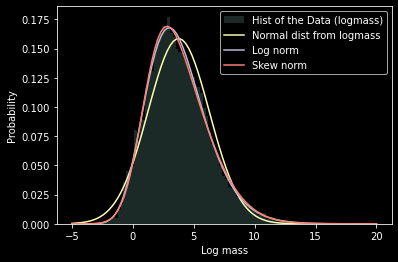

In [36]:
# Not the best... Lets try both a skew-norm and a log-norm.
p_lognorm = lognorm.fit(logmass)
pdf_lognorm = lognorm.pdf(ms, *p_lognorm)

p_skewnorm = skewnorm.fit(logmass)
pdf_skewnorm = skewnorm.pdf(ms, *p_skewnorm)

# Use pdf_norm from before

plt.hist(logmass, bins=100, density=True, alpha=0.2, label="Hist of the Data (logmass)")

plt.plot(ms, pdf_norm, label="Normal dist from logmass") # same as before
plt.plot(ms, pdf_lognorm, label="Log norm")
plt.plot(ms, pdf_skewnorm, label="Skew norm");
plt.legend()
plt.xlabel("Log mass")
plt.ylabel("Probability");

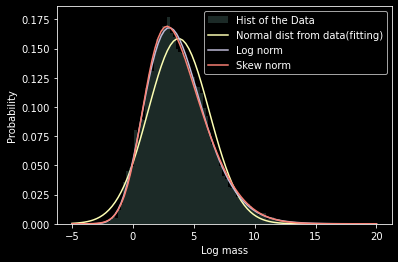

In [42]:
# Using fit method to normal too ,, Same result
p_lognorm = lognorm.fit(logmass)
pdf_lognorm = lognorm.pdf(ms, *p_lognorm)

p_skewnorm = skewnorm.fit(logmass)
pdf_skewnorm = skewnorm.pdf(ms, *p_skewnorm)

p_norm = norm.fit(logmass)
pdf_norm = norm.pdf(ms, *p_norm)

plt.hist(logmass, bins=100, density=True, alpha=0.2, label="Hist of the Data") # Same Result

plt.plot(ms, pdf_norm, label="Normal dist from data(fitting)") # same as before
plt.plot(ms, pdf_lognorm, label="Log norm")
plt.plot(ms, pdf_skewnorm, label="Skew norm");
plt.legend()
plt.xlabel("Log mass")
plt.ylabel("Probability");
# let's use p_lognorm

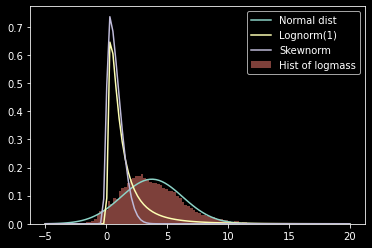

In [35]:
## The normal way of doing distributions,,, DONT USE IT ,, we need to fit it to our data first (logmass) -like before-

ms = np.linspace(-5, 20, 100)
mean, std = logmass.mean(), np.std(logmass)

pdf_norm = norm.pdf(ms, loc= mean, scale= std)
plt.plot(ms, pdf_norm, label="Normal dist" )

pdf_lognorm = scipy.stats.lognorm.pdf(ms, 1) #shape parameter =1 (highly skewed)
plt.plot(ms, pdf_lognorm, label="Lognorm(1)")

pdf_skewnorm = scipy.stats.skewnorm.pdf(ms, 6) # alpha = 6 (how skew it is)
plt.plot(ms, pdf_skewnorm, label="Skewnorm")

plt.hist(logmass, bins=100, density=True, alpha=0.5, label='Hist of logmass')
plt.legend();

In [44]:
# So either the log-norm or skew-norm looks like an adequate fit to the data. We want to extrapolate 
# this distribution out to a mass we're concerned about - ,,,,  ( the mass of a 1km diameter meteor. ),, Radius=500 meter
mass_of_doom = np.log((4/3) * np.pi * 500**3 * 1600 * 1000)  # Just using a spherical approximation and some avg density 
# 4/3 pi*R**3
mass_of_doom

34.36175044077777

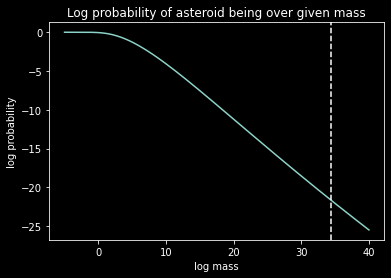

In [45]:
# So where does this value lie on our distribution. We'll go with the lognorm for now.
ms2 = np.linspace(-5, 40, 200)
plt.plot(ms2, lognorm.logsf(ms2, *p_lognorm)) # log survival fun, The chance that we get more than that value
plt.axvline(mass_of_doom, ls="--")
plt.xlabel("log mass")
plt.ylabel("log probability")
plt.title("Log probability of asteroid being over given mass"); # -20% chance of asteroid to be more than mass_of_doom, NO chance to be killer

So we have here the probability of an asteroid being above a certain mass when it hits Earth. But to answer the question "What is the probability that one or more asteroids of high mass strike Earth in 1000 years?" we need to factor in the actual time component. Assume that in the next 1000 years, we predict to have $N$ impacts.

$$P(>=1\  {\rm highmass}) = 1 - P(0\ {\rm highmass}) = 1 - P(N\ {\rm not\_highmass}) = 1 - P({\rm not\_highmass})^N$$

Imagine a similar question: Prob of getting no sixes in 5 rolls. Well its $$\frac{5}{6}\times\frac{5}{6}\times\frac{5}{6}\times\frac{5}{6}\times\frac{5}{6} = \left(\frac{5}{6}\right)^5 $$
The prob of getting one or more sixes is then $1 - (5/6)^5$.

So to give a number, we need to calculate $N$ from the yearly rate, number of years, and our detection efficiency and use that with the probability that any given impact is not high mass.

In [48]:
prob_small_mass = lognorm.logcdf(mass_of_doom, *p_lognorm) # CDF , every thing less than mass_of_doom. Num close to 1 (any asteroid has great chance to be small)
frac_sky_monitored = 0.2 # only observed 20% of the expected WE CAN CHANGE IT
num_years = 1000
num_events = num_years * counts.max() / frac_sky_monitored #counts is how many events happen in a given year, take the max(the worest year) [VERY LARGE NUM]
prob_bad = 1 - np.exp(num_events * prob_small_mass) # prob of something bad happening
print(f"Prob a >1km (1 km or more) asteroid impacts the earth for the next {num_years} years is {prob_bad * 100:.2f}%")

Prob a >1km (1 km or more) asteroid impacts the earth for the next 1000 years is 0.67%
